In [1]:
import scipy.io
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [2]:
# %matplotlib qt5
%matplotlib inline
# %matplotlib ipympl

In [3]:
x = scipy.io.loadmat('x.mat',squeeze_me=True)['x']

#### File were saved swapped ####
# y_dr = scipy.io.loadmat('y_dr.mat')['y_dr']
y_th = scipy.io.loadmat('y_dr.mat',squeeze_me=True)['y_dr']
# y_th = scipy.io.loadmat('y_th.mat')['y_th']
y_dr = scipy.io.loadmat('y_th.mat',squeeze_me=True)['y_th']

In [4]:
def lorentzian (xx, A, gamma, x0, c):
    return  A/math.pi * gamma/2 / ((xx - x0)**2 + (gamma/2)**2) + c

def lorentzianAndLinear (xx, A, gamma, x0, b, c):
    return  A/math.pi * ( gamma/2 / ((x - x0)**2 + (gamma/2)**2) ) + c + b*x


Drop fit:  [ 4.21822818e-01  1.82127904e-02  1.92398628e+02 -3.73205833e-01]
Through fit:  [-8.73447480e-04  1.75353874e-02  1.92398488e+02  4.53248713e-02
 -8.62345417e+00]


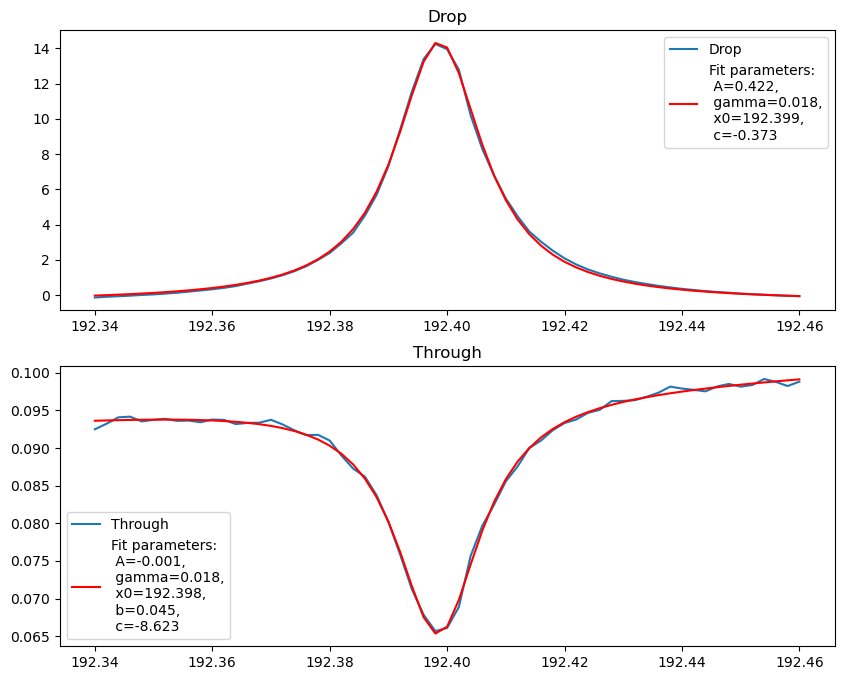

In [6]:
popt_dr, pcov_dr = curve_fit(lorentzian, x, y_dr,p0=[14, 1, 192.4, 0])
popt_th, pcov_th = curve_fit(lorentzianAndLinear, x, y_th,p0=[-1, 1, 192, 0, 1], maxfev=1000000)
print('Drop fit: ', popt_dr)
print('Through fit: ', popt_th)

fig, ax = plt.subplots(2,1, figsize = (10,8))

ax[0].plot(x,y_dr,label='Drop')
ax[0].set_title('Drop')
ax[0].plot(x, lorentzian(x, *popt_dr), 'r-', label='Fit parameters:\n A=%5.3f,\n gamma=%5.3f,\n x0=%5.3f,\n c=%5.3f' % tuple(popt_dr))
ax[0].legend()

ax[1].plot(x,y_th,label='Through')
ax[1].set_title('Through')
ax[1].plot(x, lorentzianAndLinear(x, *popt_th), 'r-', label='Fit parameters:\n A=%5.3f,\n gamma=%5.3f,\n x0=%5.3f,\n b=%5.3f,\n c=%5.3f' % tuple(popt_th))
ax[1].legend()

plt.show()